# 1.Importing Libraries and Loading the Dataset

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

#Loading the dataset
diabetes_data = pd.read_csv('diabetes_dataset.csv')

#Checking the first few rows
print(diabetes_data.head())

#Displaying the columns in the dataset
print(diabetes_data.columns)

#Checking number of rows and columns
print(diabetes_data.shape)

#Checking distribution of the target variable
print(diabetes_data['Outcome'].value_counts())


   AGE Gender   FPG  HbA1c  Nocturia  Polyuria  Weight_loss  Vomiting  Nausea  \
0   52      F   7.0    6.7      True      True         True     False   False   
1   57      M  10.8    8.0     False     False        False     False   False   
2   56      F   3.6    5.0     False     False        False     False   False   
3   32      F   7.5    6.8     False     False        False     False   False   
4   51      M   5.7    6.2     False     False        False     False   False   

   Polydipsia  Polyphagia  Headache   BMI   Outcome  
0       False       False     False  31.0  positive  
1       False       False     False  32.0  positive  
2       False       False     False  23.0  negative  
3       False       False     False  31.0  positive  
4       False       False     False  20.0  negative  
Index(['AGE', 'Gender', 'FPG', 'HbA1c', 'Nocturia', 'Polyuria', 'Weight_loss',
       'Vomiting', 'Nausea', 'Polydipsia', 'Polyphagia', 'Headache', 'BMI',
       'Outcome'],
      dtype='ob

- 3415 rows and 14 columns
- **DataTypes**: Age, Gender, FPG(Fasting Plasma Glucose), HbA1c(Haemoglobin A1c Test), Nocturia, Polyuria, Weight Loss, Vomiting, Nausea, Polydipsia, Polyphagia, Headache, BMI, Outcome
- **Explanation**:

1. *Age* - Numeric, representing the age of the individuals.
2. *Gender* - Categorical, indicating the sex (Male or Female)
3. *FPG (Fasting Plasma Glucose)* - Numeric, measures blood glucose levels after fasting (mg/dL)
4. *HbA1c (Haemoglobin A1c Test)* - Numeric, shows the average blood sugar levels over the past 2-3 months (%)
5. *Nocturia* - Categorical, indicates whether the individual experiences excessive urination at night.
6. *Polyuria* - Categorical, indicates frequent or excessive urination.
7. *Weight Loss* - Categorical, reporting significant unitentional weight loss.
8. *Vomiting* - Categorical, indicating presence of frequent vomiting episodes.
9. *Nausea* - Categorical, representing occurence of frequent nausea.
10. *Polydipsia* - Categorical, showing excessive thirst.
11. *Ployphagia* - Categorical, representing excessive hunger.
12. *Headache* - Categorical, indicating presence of frequent headaches.
13. *BMI (Body Mass Index)* - Numeric, calculated as weight in kilograms divided by height in meters squared (kg/m^2).
14. *Outcome* - Binary, representing the presence (1) or absence (0) of diabetes.

#2. Checking and Handling the missing values
- Missing values at:
1. Gender: 1 (**Replaced with the most occuring gender**)
2. BMI: 7 (**Replaced using the Mean Method**)

In [65]:
#Check for missing values
print(diabetes_data.isnull().sum())
print("Missing Values in the dataset?")
print(diabetes_data.isnull().values.any())

#Replacing the missing values
diabetes_data['Gender'].fillna(diabetes_data['Gender'].mode()[0], inplace=True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].mean(), inplace=True)

#Checking first few rows
print(diabetes_data.head())


AGE            0
Gender         0
FPG            0
HbA1c          0
Nocturia       0
Polyuria       0
Weight_loss    0
Vomiting       0
Nausea         0
Polydipsia     0
Polyphagia     0
Headache       0
BMI            0
Outcome        0
dtype: int64
Missing Values in the dataset?
False
   AGE Gender   FPG  HbA1c  Nocturia  Polyuria  Weight_loss  Vomiting  Nausea  \
0   52      F   7.0    6.7      True      True         True     False   False   
1   57      M  10.8    8.0     False     False        False     False   False   
2   56      F   3.6    5.0     False     False        False     False   False   
3   32      F   7.5    6.8     False     False        False     False   False   
4   51      M   5.7    6.2     False     False        False     False   False   

   Polydipsia  Polyphagia  Headache   BMI   Outcome  
0       False       False     False  31.0  positive  
1       False       False     False  32.0  positive  
2       False       False     False  23.0  negative  
3       F

<ipython-input-65-3ddc6c92bf58>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_data['BMI'].fillna(diabetes_data['BMI'].mean(), inplace=True)


#3. Label encoding
- Converting Categorical Columns to Numeric Values e.g. Gender [M,F] before scaling.

In [96]:
#Check for non-numeric columns
non_numeric_columns = diabetes_data.select_dtypes(include=['object']).columns
print(non_numeric_columns)

#Label encoding the Gender column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
diabetes_data['Gender'] = le.fit_transform(diabetes_data['Gender'])

#Checking first few rows
print(diabetes_data.head())

Index(['Outcome'], dtype='object')
   AGE  Gender   FPG  HbA1c  Nocturia  Polyuria  Weight_loss  Vomiting  \
0   52       0   7.0    6.7      True      True         True     False   
1   57       1  10.8    8.0     False     False        False     False   
2   56       0   3.6    5.0     False     False        False     False   
3   32       0   7.5    6.8     False     False        False     False   
4   51       1   5.7    6.2     False     False        False     False   

   Nausea  Polydipsia  Polyphagia  Headache   BMI   Outcome  
0   False       False       False     False  31.0  positive  
1   False       False       False     False  32.0  positive  
2   False       False       False     False  23.0  negative  
3   False       False       False     False  31.0  positive  
4   False       False       False     False  20.0  negative  


#4. Data Visualization


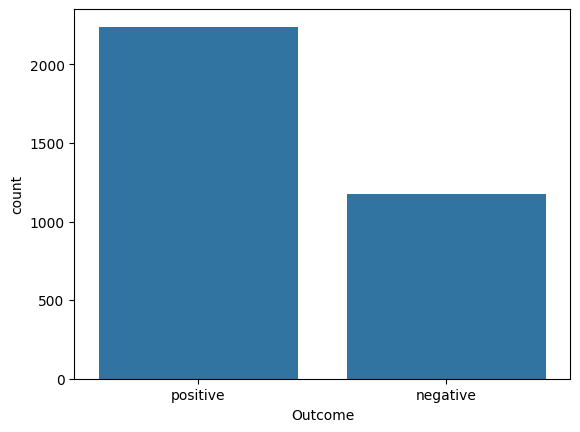

In [67]:
sns.countplot(x='Outcome', data=diabetes_data)
plt.show()

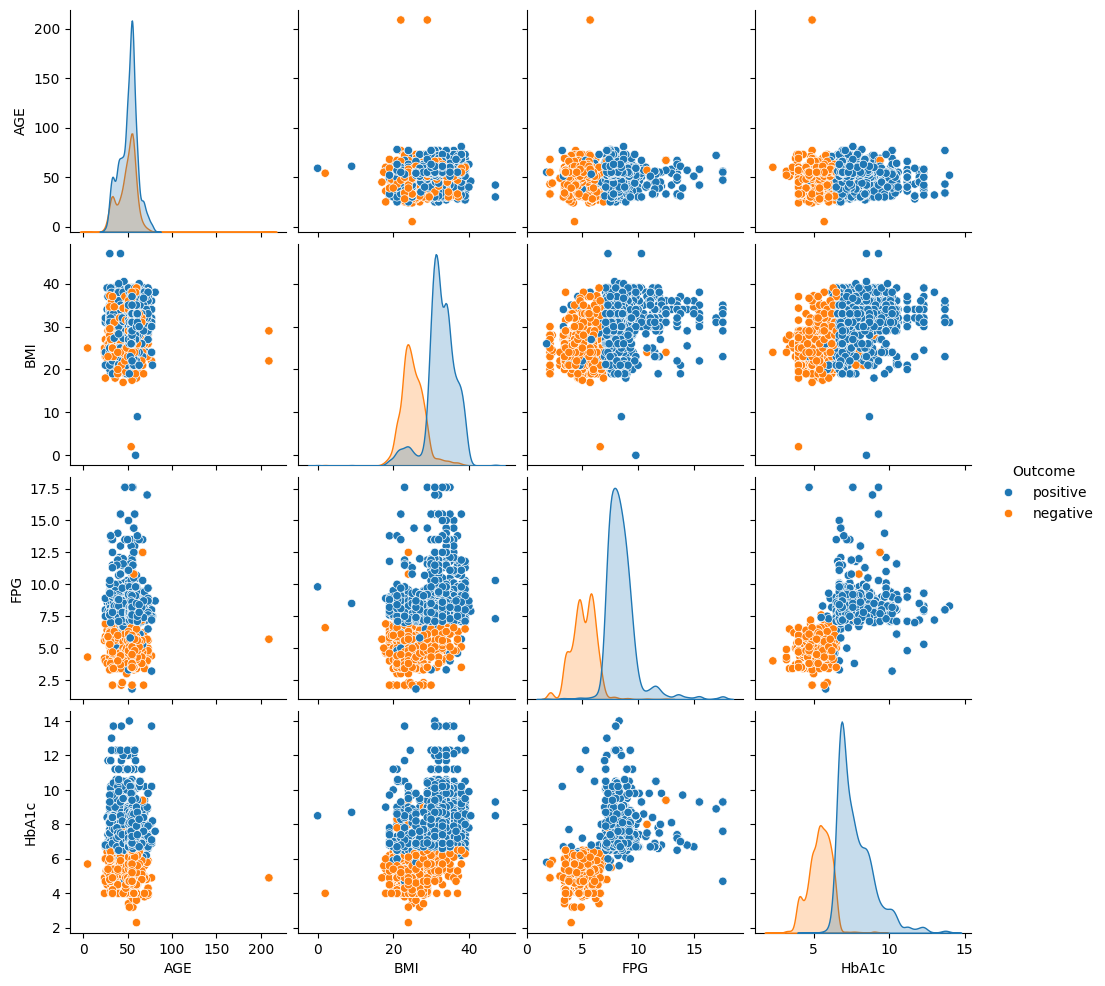

In [68]:
#Using pairplot
sns.pairplot(diabetes_data, hue='Outcome', vars=['AGE', 'BMI', 'FPG', 'HbA1c'])
plt.show()

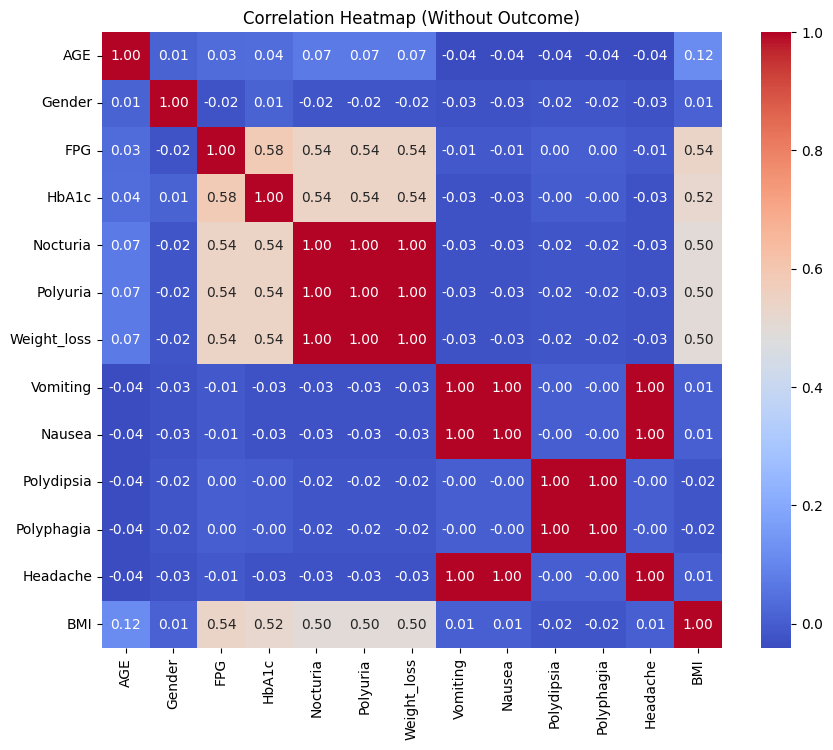

In [69]:
#Using Heatmap
#Dropping the 'Outcome' column
data_without_outcome = diabetes_data.drop('Outcome', axis=1)

#Calculating correlation matrix
correlation_matrix = data_without_outcome.corr()

#Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Without Outcome)')
plt.show()

#5. Splitting data into Features and Target
- Separating the features (input) and the target (output) variable.
- The **features** are the independent variables which the model will use to make predictions.
- The 'Outcome' column is the **target variable**, which is what the model will try to predict (**whether positive or negative**)

In [70]:
#Define features (x) and target (y)
x = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

#6. Splitting data into Training and Testing sets

In [101]:
# Split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#printing the data shape
print("Training Data Shape:", x_train.shape, y_train.shape)
print("Testing Data Shape:", x_test.shape, y_test.shape)

Training Data Shape: (2732, 13) (2732,)
Testing Data Shape: (683, 13) (683,)


#7. Data Scaling
- Standardizing the features to improve model performance

In [75]:
#Standardizing the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#Save the scaler for later use
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
print('Scaler saved successfully!')

Scaler saved successfully!


#Class Weights

In [102]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

print("Class Weights:", class_weight_dict)

Class Weights: {'negative': 1.4378947368421053, 'positive': 0.7665544332210998}


#8. Training the Model
- Using Random Classifier

In [103]:
#Initialize the model
from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier()
#model = RandomForestClassifier(class_weight=class_weight_dict, random_state=42)
model = RandomForestClassifier(class_weight='balanced')

#Train the model
model.fit(x_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced')

#9. Predictions

In [104]:
#Making Predictions
y_pred = model.predict(x_test_scaled)

#10. Evaluating the Model
- Using accuracy and classification report (precision, recall, F1-score)

Accuracy: 0.9941434846266471

Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.98      0.99       226
    positive       0.99      1.00      1.00       457

    accuracy                           0.99       683
   macro avg       1.00      0.99      0.99       683
weighted avg       0.99      0.99      0.99       683



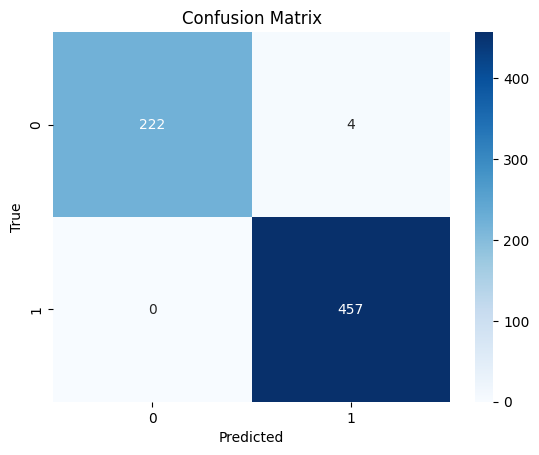

In [105]:
#Evaluating the model
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Report**:
1. **True Positive (TP)** - 457
2. **True Negative (TN)** - 222
3. **False Positive (FP)** - 4
4. **False Negative (FN)** - 0

#11. Saving the Model
- Using Pickle for serializing (saving)  and deserializing (loading) Python objects.
- Ensures you don't have to retrain the model every time it will be used

In [106]:
import pickle

# Save the trained model
model_filename = 'diabetes-prediction-model.pkl' #string variable holding the name of the file where the trained model will be saved
pickle.dump(model, open(model_filename, 'wb')) #Opens a file in write-binary (wb) mode to save the binary data
print(f"Model saved as {model_filename}")

Model saved as diabetes-prediction-model.pkl


#12. Loading the Model
- To read the saved file and reconstructs the trained model

In [107]:
import pickle
import numpy as np

#loaded_model = pickle.load(open(model_filename, 'rb')) #Opens the file in read-binary(rb) mode to read the binary data
#print("Model loaded successfully")

model_filename = "diabetes-prediction-model.pkl"
scaler_filename = "scaler.pkl"

# Load the trained model
with open(model_filename, 'rb') as model_file:
    loaded_model = pickle.load(model_file)
print("Model loaded successfully")

# Load the scaler
with open(scaler_filename, 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)
print("Scaler loaded successfully")



Model loaded successfully
Scaler loaded successfully


#13. Making Predictions
- Inputting some data for prediction.
- Should give a response on whether it is positive or negative

In [109]:
#new_data = np.array([[50, 0, 5.8, 5.7, 1, 1, 1, 1, 1, 1, 1, 1, 24]])
#prediction = loaded_model.predict(new_data)
#print("Prediction:", prediction)

sample_input = [
    57,       # AGE
    1,        # Gender (1 for Male, 0 for Female)
    10.8,    # FPG
    1,      # HbA1c
    1,        # Nocturia
    1,        # Polyuria
    1,        # Weight_loss
    1,        # Vomiting
    1,        # Nausea
    1,        # Polydipsia
    1,        # Polyphagia
    1,        # Headache
    32.0,     # BMI
]

#input_array = np.array(sample_input).reshape(1, -1)
#scaled_input = loaded_scaler.transform(input_array)
#prediction = loaded_model.predict(scaled_input)

input_array = np.array(sample_input).reshape(1, -1)
scaled_input = scaler.transform(input_array)
prediction = model.predict(input_array)

print("Input before scaling:", input_array)
print("Input after scaling:", scaled_input)

if prediction[0] == 1:
    print("Positive for Diabetes")
else:
    print("Negative for Diabetes")

Input before scaling: [[57.   1.  10.8  1.   1.   1.   1.   1.   1.   1.   1.   1.  32. ]]
Input after scaling: [[ 0.60684399  0.94305351  1.68077564 -3.76245583  0.92791994  0.92791994
   0.92791994 36.9459064  36.9459064  52.25897052 52.25897052 36.9459064
   0.4085715 ]]
Negative for Diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# 14. Download after Verification
- Download the mk1 file since it will be used for the web app.

In [110]:
from google.colab import files

files.download(model_filename)
print("Model downloaded successfully!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model downloaded successfully!
